In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# A. Klasifikasi gender dari profil user Twitter

Tutorial ini menggunakan <i>dataset</i> dari <a href='https://www.kaggle.com/efeergun96/classification-by-tweets-nlp'>Kaggle</a> yang telah dimodifikasi untuk mengklasifikasikan <i>gender</i> pengguna Twitter. <i>Dataset</i> ini memuat informasi pengguna Twitter dan juga sampel <i>tweet</i>. Tabel 1 merangkum informasi atribut pada <i>dataset</i> yang digunakan pada tutorial ini (<i>data_gender.csv</i>). 

Tabel 1. Informasi Atribut pada <i>Dataset data_gender.csv</i>

|Nama Atribut|Jenis Data|Keterangan| 
|------|------|------|
|<i>gender</i>|kategorikal|gender penggunan Twitter, akan digunakan sebagai label|
|<i>fav_number</i>|numerik|jumlah tweet yang difavoritkan oleh pengguna|
|<i>link_color</i>|kategorikal|warna link pada profil pengguna, dituliskan dalam hex code|
|<i>retweet_count</i>|numerik|jumlah tweet yang di-retweet oleh pengguna|
|<i>sidebar_color</i>|kategorikal|warna sidebar pada profil pengguna, dituliskan dalam hex code|
|<i>tweet_count</i>|numerik|jumlah tweet yang ditulis oleh pengguna|
|<i>user_timezone</i>|kategorikal|jenis zona waktu pengguna|

Langkah-langkah untuk mengklasifikasikan <i>gender</i> dari <i>dataset</i> tersebut adalah sebagai berikut:

<b>1. Membaca data</b><br>
Library pandas digunakan untuk membaca <i>dataset</i>. Tipe data yang terbentuk setelah membaca berkas csv menggunakan fungsi $read\_csv$ dari pandas adalah <i>dataframe</i>. Untuk mengetahui dimensi dari <i>dataframe</i> yang terbentuk, dapat digunakan properti $shape$. Sementara itu, $data.head()$ digunakan untuk menampilkan sampel data (5 teratas). 

<b>#Code 1</b>

In [2]:
# membaca data menggunakan pandas

import pandas as pd

data = pd.read_csv('/content/drive/My Drive/dataset/gender-data.csv', delimiter=',')
print(data.shape)
data.head()

(6323, 7)


,gender,fav_number,link_color,retweet_count,sidebar_color,tweet_count,user_timezone
0,male,0,08C2C2,0,FFFFFF,110964,Chennai
1,female,37318,3B94D9,0,0,31462,-
2,female,3901,F5ABB5,0,0,20036,Central Time (US & Canada)
3,female,1825,9266CC,0,0,482,-
4,female,3115,9266CC,0,FFFFFF,26085,Amsterdam


<b>2. Fungsi $describe()$</b><br>
Fungsi $describe()$ digunakan untuk menampilkan gambaran statistik singkat dari keseluruhan data atau kolom/fitur tertentu dari data.

<b>#Code 2</b>

In [3]:
data.describe()

,fav_number,retweet_count,tweet_count
count,6323.000000,6323.000000,6.323000e+03
mean,7213.308082,0.099004,3.454298e+04
std,15519.930249,2.148255,7.721278e+04
min,0.000000,0.000000,1.000000e+00
25%,329.000000,0.000000,4.245000e+03
50%,1951.000000,0.000000,1.333100e+04
75%,7149.000000,0.000000,3.736200e+04
max,341621.000000,153.000000,2.680199e+06


Fungsi $describe()$ akan menampilkan statistik standar (<i>mean</i>, <i>std</i>, <i>min</i>, <i>max</i>) untuk kolom/atribut bertipe kuantitatif (numerik), sedangkan untuk kolom bertipe kualitatif  (kategorikal) maka informasi yang akan ditampilkan berupa:
* count: Jumlah <i>filled in</i>/ row yang terisi
* unique: Berapa banyak nilai unik/level
* top: Nama item yang paling banyak muncul dalam data
* Freq: Seberapa sering top item umum muncul dalam data

contoh:

In [4]:
data['sidebar_color'].value_counts(dropna=False)

0         2702
FFFFFF    2662
181A1E     236
65B0DA     155
5ED4DC     143
A8C7F7     142
BDDCAD      83
CC3366      78
DFDFDF      53
DBE9ED      51
F0A830      14
80808        4
Name: sidebar_color, dtype: int64

<b>3. Transformasi data kategorikal ke numerik</b><br>
Atribut kategorikal perlu ditransformasi ke dalam bentuk numerik untuk bisa digunakan sebagai fitur dalam klasifikasi. Proses <i>encoding</i> dari data kategorikal ke dalam data numerik dapat dilakukan dengan properti <i>cat.codes</i>.

<b>#Code 3a</b><br>
Menampilkan tipe data sebelum transformasi

In [5]:
# tipe data column sebelum transformasi

print("Column Data Type before transformation \n" + str(data.dtypes))

Column Data Type before transformation 
gender           object
fav_number        int64
link_color       object
retweet_count     int64
sidebar_color    object
tweet_count       int64
user_timezone    object
dtype: object


<b>#Code 3b</b><br>
Mengubah semua kolom dengan tipe “object” ke dalam bentuk “category”

In [6]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(
    ['object']).apply(lambda x: x.astype('category'))

print("Column Data Type After Transformation\n" + str(data.dtypes))

Column Data Type After Transformation
gender           category
fav_number          int64
link_color       category
retweet_count       int64
sidebar_color    category
tweet_count         int64
user_timezone    category
dtype: object


<b>#Code 3c</b><br>
Melakukan <i>encoding data</i> kategorikal ke dalam tipe data numerik dengan cat.codes

In [7]:
data[data.select_dtypes(['category']).columns] = data.select_dtypes(
    ['category']).apply(lambda x: x.cat.codes)

print("Column Data Type After Transformation\n" + str(data.dtypes))
data.head()

Column Data Type After Transformation
gender            int8
fav_number       int64
link_color       int16
retweet_count    int64
sidebar_color     int8
tweet_count      int64
user_timezone    int16
dtype: object


,gender,fav_number,link_color,retweet_count,sidebar_color,tweet_count,user_timezone
0,1,0,130,0,11,110964,40
1,0,37318,536,0,0,31462,0
2,0,3901,1495,0,0,20036,39
3,0,1825,972,0,0,482,0
4,0,3115,972,0,11,26085,11


<b>4. Mendefinisikan fitur dan label</b><br>
Pada tutorial ini, dari 6 fitur  kita hanya menggunakan 3 fitur yang meliputi $link\_color$, $sidebar\_color$, dan $tweet\_count$ dalam melakukan klasifikasi <i>gender</i>. Kolom <i>gender</i> digunakan sebagai label.

<b>#Code 4</b>

In [8]:
# mendefinisikan fitur dan label

feat_column = ['link_color', 'sidebar_color', 'tweet_count']
feat = data[feat_column]
label = data['gender']

<b>5. Pembagian Data, Training dan Testing</b><br>
Pada percobaan ini, dilakukan pembagian proporsi 90:10 dimana 90% dibagi menjadi data training dan 10% menjadi data testing. Multinomial Naïve Bayes digunakan untuk membentuk model yang mempelajari data training. Selanjutnya, model yang dibangun digunakan untuk memprediksi data testing yang tidak berlabel.

<b>#Code 5a</b><br>
Melakukan <i>import model selection</i>

In [9]:
# import model selection
from sklearn.model_selection import train_test_split

<b>#Code 5b</b><br>
Pembagian data dengan proporsi 90:10 untuk <i>training</i> dan <i>testing</i> model

In [10]:
# pembagian data dengan proporsi 90:10

train_feat, test_feat, train_labels, test_labels = train_test_split(
    feat, label, test_size=0.1, random_state=150)

print(train_feat.shape)
print(test_feat.shape)

(5690, 3)
(633, 3)


<b>#Code 5c</b><br>
<i>Training</i> dan <i>testing</i> model

In [11]:
# inisiasi jenis classifier
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

# training classifier
classifier_model = NB.fit(train_feat, train_labels)

# prediksi data testing
pred = classifier_model.predict(test_feat)

<b>6. Evaluasi</b><br>
Secara umum, evaluasi pada klasifikasi diukur dengan menggunakan akurasi.
Akurasi dihitung berdasarkan jumlah data yang diprediksi benar dibagi dengan total
data yang diuji secara keseluruhan. Namun ada pula beberapa metrik evaluasi yang
lain, misalnya <i>precision</i> dan <i>recall</i>.

<b>#Code 6</b>

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("Akurasi = ", accuracy_score(test_labels, pred))
print("Precision = ", precision_score(test_labels, pred))
print("Recall = ", recall_score(test_labels, pred))

print(confusion_matrix(test_labels, pred))

Akurasi =  0.5497630331753555
Precision =  0.4745098039215686
Recall =  0.44485294117647056
[[227 134]
 [151 121]]


<b>7. Visualisasi Confusion Matrix</b><br>
Visualisasi digunakan untuk memudahkan pembacaan <i>confusion matrix</i>. <i>Source code</i> visualisasi confusion matrix dapat didapatkan dari halaman resmi <a href='https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html'>scikit-learn</a>.

<b><font color='red'>Tugas Tutorial A</font></b>
1. Buatlah visualisasi <i>confusion matrix</i> yang dinormalisasi dari hasil prediksi pada data testing. Buatlah interpretasi dari <i>confusion matrix</i> tersebut. 
2. Lakukan percobaan klasifikasi data <i>gender</i> tersebut dengan model klasifikasi yang lain, yaitu:
    * Logistic Regression jika nama lengkap Anda dimulai dengan huruf A-I 
    * Decision Tree jika nama lengkap Anda dimulai dengan huruf J-R
    * K-Nearest Neighbor dengan jumlah $k=5$ jika nama lengkap Anda dimulai dengan huruf S-Z
    
  Lakukan evaluasi dengan parameter akurasi, <i>precision</i>, <i>recall</i>, dan F1-score. Bandingkan hasil evaluasi tersebut terhadap model Multinomial Naive Bayes yang kita gunakan sebelumnya.

**Jawaban Tugas A**

__No. 1__

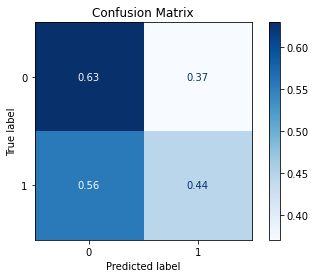

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(test_labels, pred)

disp = plot_confusion_matrix(classifier_model, test_feat, test_labels, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix")

plt.show()

Dari *confusion matrix* di atas, dapat dilihat bahwa *True Negatives (TN)* bernilai 0.63 dan *True Positives (TP)* bernilai 0.44. Selain itu, *False Negatives (TP)* bernilai 0.56 dan *False Positives (FP)* bernilai 0.37. Dengan nilai FN yang relatif tinggi mengindikasikan model gagal mendeteksi gender pria justru dideteksi sebagai wanita, serta FP yang juga relatif tinggi yang mengindikasikan model juga kurang baik mendeteksi gender wanita yang justru dideteksi sebagai pria.

__No. 2__
<br/>
*Nama lengkap dimulai huruf M -> __Decision Tree__*

In [14]:
# inisiasi jenis classifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

# training classifier
classifier_model_DTC = DTC.fit(train_feat, train_labels)

# prediksi data testing
pred_DTC = classifier_model.predict(test_feat)

In [15]:
from sklearn.metrics import f1_score

print("Akurasi = ", accuracy_score(test_labels, pred_DTC))
print("Precision = ", precision_score(test_labels, pred_DTC))
print("Recall = ", recall_score(test_labels, pred_DTC))
print("F1 Score = ", f1_score(test_labels, pred_DTC))

Akurasi =  0.5497630331753555
Precision =  0.4745098039215686
Recall =  0.44485294117647056
F1 Score =  0.45920303605313095


Jika dibandingkan dengan Multinomial NB, Decision Tree Classifier cenderung menghasilkan performa yang relatif lebih baik. Hal ini ditandai dengan nilai akurasi, precision dan recall yang lebih tinggi jika dibandingkan dengan nilai yang dihasilkan saat menggunakan Multinomial NB. Namun, secara keseluruhan performa dari model Decision Tree Classifier pun masih belum sempurna karena nilainya masih relatif rendah. Hal ini dapat ditingkatkan melalui penggunaan cross validation, pemilihan fitur yang lebih prediktif, feature engineering, atau juga dapat dilakukan parameter tuning untuk mendapat hasil yang lebih baik.

# B. Klasifikasi Emosi pada Tweet Bahasa 

Pada tutorial ini, kita akan mengklasifikan <i>tweet</i> Bahasa Indonesia ke dalam lima kelas emosi yaitu senang, cinta, marah, sedih, dan takut. <i>Dataset</i> yang digunakan dalam percobaan ini didapatkan dari <i>paper</i> berikut:

Mei Silvana Saputri, Rahmad Mahendra, and Mirna Adriani, <i>Emotion Classification on Indonesian Twitter Dataset</i>.  International Conference on Asian Language Processing (IALP) 2018. Bandung. 2018. 

<i>Dataset</i> terdiri dari 4.403 <i>tweet</i> yang sudah dilakukan <i>pre-processing</i> dengan ketentuan sebagai berikut:
* <i>Username</i> dan <i>mention</i> (ditandai dengan @) diganti dengan kata [USERNAME]
* URL/<i>hyperlink</i> (http:// atau https://..) diganti dengan kata [URL]
* Nomor sensitif, misalnya nomor telepon, nomor <i>invoice</i>, dan nomor pelacakan jasa pengiriman diganti dengan kata [SENSITIVE-NO]

<i>Dataset</i> ini memuat <i>tweet</i> beremosi eksplisit dan implisit. Tabel 2 menunjukkan contoh <i>tweet</i> beremosi eksplisit dan implisit.

Tabel 2. Contoh Data Emosi Eksplisit dan Emosi Implisit

| Emosi Eksplisit | Emosi Implisit |
|------|------|
|hari ini libur, rencananya mau nonton Jurassic World, tapi kayanya gajadi deh mengingat kondisi yg gak fit bgt ini <b>sebel</b>. Rusak rencana sebelanga.. <b>sebel</b> akutu <font color='blue'>(marah)</font>|Ini aja membuktikan anda sudah TIDAK BENAR....!!! MASA NAPI KORUPTOR BISA PUNYA HP DI PENJARA ITU SDH MELANGGAR ATURAN.... DAN ANDA DG ENAKNYA MELANGGAR ATURAN...!! INI MENANDAKAN BAHWA ITULAH KARAKTER ANDA <font color='blue'>(marah)</font>|

Untuk mengklasifikan <i>tweet</i> menjadi lima kelas emosi, dilakukan ekstraksi 4 fitur berikut:
* Fitur Bag-of-words (unigram)
* Fitur Sentimen Lexicon
* Fitur POS Tag
* Fitur Ortografi

Langkah-langkah untuk melakukan klasifikasi emosi pada <i>dataset tweet</i> emosi tersebut adalah sebagai berikut:

<b>1. Import library</b><br>
<i>Library</i> yang digunakan pada tutorial ini antara lain pandas, numpy, nltk, Sastrawi, dan sklearn. 

<b>#Code 1</b>

In [16]:
!pip install Sastrawi
!pip install nltk
!pip install python-crfsuite

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 747kB 2.8MB/s 


In [17]:
import pandas as pd
import numpy as np
import nltk
import Sastrawi
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.tag import CRFTagger
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<b>2. Membaca data</b><br>
Data dibaca dengan <i>library</i> pandas.

<b>#Code 2</b>

In [19]:
# membaca data
raw_data = pd.read_csv("/content/drive/My Drive/dataset/Twitter_Emotion_Dataset.csv",
                       delimiter=",", encoding="Latin-1")
raw_data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


<b>3. Pra-pemrosesan data</b><br>
Data Twitter bersifat <i>unstructured</i> dan memiliki format penulisan bebas (tidak sesuai kaidah penulisan yang benar). Oleh karena itu, dilakukan pra-pemrosesan data untuk melakukan normalisasi isi <i>tweet</i>. 

Dalam percobaan ini, dilakukan pra-pemrosesan berupa:

    a. Normalisasi tweet
    Normalisasi tweet terdiri dari pengubahan ke huruf kecil, pembuangan spasi yang berlebihan, trimming, pembuangan tanda baca, penghilangan huruf berulang (misalnya haiiii -> hai). Fungsi normalisasi (tweet) menerima input berupa satu buah tweet mentah bertipe string. 

<b>#Code 3a</b>

In [20]:
def normalisasi(tweet):
    normal_tw = tweet.lower()  # lowercase
    normal_tw = re.sub('\s+', ' ', normal_tw)  # remove extra space
    normal_tw = normal_tw.strip()  # trim depan belakang
    normal_tw = re.sub(r'[^\w\s]', '', normal_tw)  # buang punctuation
    # regex huruf yang berulang kaya haiiii (untuk fitur unigram)
    normal_regex = re.compile(r"(.)\1{1,}")
    # buang huruf yang berulang
    normal_tw = normal_regex.sub(r"\1\1", normal_tw)
    return normal_tw

    b. Pembuangan stopwords dan istilah spesial (username, hyperlink, sensitive-no)
    Daftar stopwords didapatkan dari penelitian Tala.
    
    Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.S. thesis. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteti van Amsterdam The Netherlands.
    
    Fungsi remove_stopwords(tweet) menerima masukan berupa tweet yang sudah dinormalisasi yang bertipe string.
    
<b># Code 3b</b>

In [21]:
def remove_stopwords(tweet):
    stopwords = pd.read_csv('/content/drive/My Drive/dataset/stopwords.csv', header=None)[0].values
    special_list = ['username', 'url', 'sensitive-no']
    token = nltk.word_tokenize(tweet)
    token_afterremoval = []
    for k in token:
        if k not in stopwords and k not in special_list:
            token_afterremoval.append(k)

    str_clean = ' '.join(token_afterremoval)
    return str_clean

    c. Di luar tutorial ini Anda bisa mencoba opsi stemming pada tahap pra-pemrosesan. Fungsi stemming akan didefinisikan pada tutorial ini, namun tidak dijalankan. Fungsi stemming(tweet) menerima masukan berupa satu buah tweet bertipe string. 

<b>#Code 3c</b>

In [22]:
def stemming(tweet):
    token = nltk.word_tokenize(tweet)
    stem_kalimat = []
    for k in token:
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        stem_kata = stemmer.stem(clean_tw)
        stem_kalimat.append(stem_kata)

    stem_kalimat_str = ' '.join(stem_kalimat)

    d. Pra-pemrosesan tweet secara keseluruhan
    Pada tahap ini, akan dilakukan pemanggilan fungsi normalisasi dan remove_stopwords yang sudah didefinisikan sebelumnya. Setelah itu akan ditampilkan sampel tiga tweet pertama yang sudah dilakukan pra-pemrosesan. 
    
<b>#Code 3d</b>    

In [23]:
def pra_pemrosesan(list_tweet):
    tweet_clean = []
    for tw in list_tweet:
        normal_tweet = normalisasi(tw)
        nosw_tweet = remove_stopwords(normal_tweet)
        #stem_tweet = stemming(nosw_tweet)
        tweet_clean.append(nosw_tweet)
    return tweet_clean


raw_tweet = raw_data['tweet']
label = raw_data['label'].tolist()

clean_tweet = pra_pemrosesan(raw_tweet)
clean_tweet[:3]

['jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk pmbhasan jgn berpolitik pengaturan wilayahhak gubernur tn abang turun temurunpelikperlu kesabaran',
 'cewe lho kayaknya rasain sibuk jaga rasain sakitnya haid paniknya pulang malem gimana orang asing wajarlah korban takut curhat dibela dihujat',
 'kepingin gudeg mbarek bu hj amad foto google sengaja biar temanteman jg membayangkannya berbagi indah']

<b>4. Ekstraksi Fitur Bag-of-Words</b><br>
Fitur Bag-of-Words atau <i>unigram</i> memuat informasi mengenai frekuensi kemunculan suatu kata di dokumen. Fitur <i>unigram</i> dibentuk menggunakan <i>library</i> $CountVectorizer$ dari $Scikit-learn$. Jumlah kata unik (<i>vocabulary</i>) yang terbentuk bergantung dari data yang digunakan. Tapi, dalam percobaan ini akan digunakan parameter max_features=2000 dimana akan diambil 2.000 kata unik yang memiliki frekuensi kemunculan tertinggi. 

<b>#Code 4</b>

In [24]:
def EkstraksiBoW(tweet):
    unigram = CountVectorizer(ngram_range=(1, 1), max_features=2000)
    unigram_matrix = unigram.fit_transform(np.array(tweet)).todense()
    nama_fitur = unigram.get_feature_names()
    return unigram_matrix, nama_fitur


unigram_feat, feat_name = EkstraksiBoW(clean_tweet)
print(unigram_feat[:3])
print(feat_name[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['10', '100', '11', '12', '15', '20', '2016', '2017', '2018', '2019']


<b>5. Ekstraksi Fitur Sentimen Leksikon (Kamus Sentimen)</b><br>
Orientasi sentimen dapat digunakan sebagai fitur untuk klasifikasi. Pada tutorial ini, akan digunakan leksikon sentimen dari penelitian berikut ini:

Clara Vania, Moh. Ibrahim, and Mirna Adriani. Sentiment Lexicon Generation for an Under-Resourced Language. CICLING 2014 (IJCLA)

Daftar kata bersentimen positif terdapat pada <i>positif_vania.txt</i> dan daftar kata bersentimen negatif terdapat pada <i>negatif_vania.txt</i>. 

<b>#Code 5a</b><br>
<i>Code</i> ini digunakan untuk mendefinisikan fungsi Ekstraksi Sentimen yang menerima input berupa daftar <i>tweet</i>.

In [25]:
def EkstraksiSentimen(list_tweet):
    pos = pd.read_csv("/content/drive/My Drive/dataset/positif_vania.txt", header=None, names=['pos'])
    list_pos = pos['pos'].tolist()
    neg = pd.read_csv("/content/drive/My Drive/dataset/negatif_vania.txt", header=None, names=['neg'])
    list_neg = neg['neg'].tolist()

    fitur_sentimen_all = []
    for tweet in list_tweet:
        # inisiasi value
        emosi = ["positif", "negatif"]
        value = [0, 0]
        emosi_value = {}
        for i in range(len(emosi)):
            emosi_value[emosi[i]] = value[i]

        list_kata = tweet.split()
        for k in list_kata:
            if k in list_pos:
                emosi_value["positif"] += 1
            if k in list_neg:
                emosi_value["negatif"] += 1

        fitur_sentimen_perkalimat = list(emosi_value.values())
        fitur_sentimen_all.append(fitur_sentimen_perkalimat)

    return fitur_sentimen_all

<b>#Code 5b</b><br>
Pemanggilan fungsi $EkstraksiSentimen$ dan menampilkan sampel hasil ekstraksi. 

In [26]:
sentlex_feat = EkstraksiSentimen(clean_tweet)
print(sentlex_feat[:10])

[[1, 0], [0, 2], [1, 0], [0, 0], [1, 0], [0, 2], [0, 0], [0, 0], [0, 1], [0, 0]]


<b>6. Ekstraksi Fitur Part-Of-Speech Tag</b><br>
<i>Part-of-speech</i> (POS) merupakan kelas kata yang dapat digunakan untuk mengenali emosi pada <i>tweet</i>. Pada percobaan ini, akan dihitung kemunculan kata sifat (JJ) dan kata negasi (NEG) berdasarkan <i>pre-trained</i> POS Tag dari penelitian Dinakarami et. al. yang sudah dikonversi ke dalam bentuk CRF Tagger agar bisa dibaca dari NLTK. 

Arawinda Dinakaramani, Fam Rashel, Andry Luthfi, and Ruli Manurung. <i>Designing an Indonesian Part of speech Tagset and Manually Tagged Indonesian Corpus</i>. International Conference on Asian Language Processing (IALP 2014). Kuching, 20-22 October 2014.

<i>Raw data pre-trained</i> POS Tag yang belum ditransformasi ke dalam bentuk CRF Tagger bisa didapatkan di Fam Rashel’s <a href='https://github.com/famrashel/idn-tagged-corpus'>Github</a>. 

<b>#Code 6a</b><br>
Mendefinisikan fungsi $EkstraksiPOS$ yang menerima masukan berupa daftar <i>tweet</i>.

In [27]:
def EkstraksiPOS(list_tweet):
    ct = CRFTagger()
    ct.set_model_file("/content/drive/My Drive/dataset/all_indo_man_tag_corpus_model.crf.tagger")
    pos_feat_list = []
    count_tag = []
    for tweet in list_tweet:
        token = nltk.word_tokenize(tweet)
        tag = ct.tag_sents([token])
        flat_tag = [item for sublist in tag for item in sublist]
        pos_count = Counter([j for i, j in flat_tag])
        pos_feat = (pos_count['JJ'], pos_count['NEG'])
        pos_feat_list.append(pos_feat)
    return pos_feat_list

<b>#Code 6b</b><br>
Memanggil fungsi $EkstraksiPOS$ dan menampilkan sampel

In [28]:
postag_feat = EkstraksiPOS(clean_tweet)
print(postag_feat[:3])

[(0, 0), (5, 0), (1, 0)]


<b>7. Ekstraksi Fitur Ortografi</b><br>
Pada percobaan ini, fitur ortografi yang digunakan sebagai fitur untuk mengenali emosi pada <i>tweet</i> yaitu jumlah huruf kapital, jumlah tanda seru, jumlah huruf dan panjang karakter. Oleh karena itu, <i>dataset</i> yang digunakan untuk menghasilkan fitur ortografi merupakan dataset awal yang belum mengalami pra-pemrosesan. 

<b>#Code 7a</b><br>
Mendefinisikan fungsi $EkstraksiOrtografi$.

In [29]:
def EkstraksiOrtografi(raw_tweet):
    all_orto_feat = []
    for tw in raw_tweet:
        capital_count = sum(1 for c in tw if c.isupper())
        exclamation_count = sum((1 for c in tw if c == "!"))
        word_len = len(nltk.word_tokenize(tw))
        char_len = len(tw)
        orto_feat = [capital_count, exclamation_count, word_len, char_len]
        all_orto_feat.append(orto_feat)
    return all_orto_feat

<b>#Code 7b</b><br>
Memanggil fungsi EkstraksiPOS

In [30]:
orto_feat = EkstraksiOrtografi(raw_tweet)
orto_feat[:3]

[[35, 0, 41, 220], [3, 0, 44, 235], [5, 0, 22, 116]]

<b>8. Klasifikasi</b><br>
Pada percobaan ini, klasifikasi dilakukan dengan menggunakan algoritma Multinomial Naïve Bayes. Pembagian data training dan testing digunakan menggunakan model k-fold Cross Validation dengan nilai $k = 10$. Dengan model Cross-Validation, proses training dan testing akan dilakukan sebanyak $k$ kali dengan pembagian data yang berbeda. 

<b>#Code 8</b><br>

In [31]:
feat_list = [unigram_feat, sentlex_feat, postag_feat, orto_feat]
feat_name = ["Unigram", "Sentimen", "POS", "Ortografi"]
for f, n in zip(feat_list, feat_name):
    X = f
    y = label
    scoring = ['accuracy', 'f1_macro']
    nb = MultinomialNB()
    scores = cross_validate(nb, X, y, cv=10, scoring=scoring)
    acc = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1_macro'])
    print("Jenis Fitur : ", n)
    print("Akurasi :", acc)
    print("F1-Score :", f1)
    print("---------------")

Jenis Fitur :  Unigram
Akurasi : 0.6162280972995259
F1-Score : 0.6164587333032618
---------------
Jenis Fitur :  Sentimen
Akurasi : 0.3149299113584828
F1-Score : 0.17759729296827526
---------------
Jenis Fitur :  POS
Akurasi : 0.2503973407544836
F1-Score : 0.08046097167342903
---------------
Jenis Fitur :  Ortografi
Akurasi : 0.299930426716141
F1-Score : 0.1940956956279642
---------------


<b><font color='red'>Tugas Tutorial B</font></b>
1. Menurut pemahaman Anda, apa yang dimaksud dengan fitur ortografi?
2. Buatlah fitur lain yang dapat diekstrak dari <i>dataset</i>.<br><i>Hint</i>: terdapat leksikon lainnya yang dapat digunakan untuk mengekstraksi fitur sentimen leksikon yang baru, seperti <a href='https://github.com/fajri91/InSet'>InSet</a> dan <a href='https://github.com/masdevid/sentistrength_id'>sentistrength_id</a>. 
3. Gunakan algoritma Decision Tree untuk  melakukan klasifikasi emosi dengan kombinasi 2 fitur dari 4 fitur yang sudah kita ekstraksi sebelumnya (unigram, sentimen leksikon, POS Tag dan ortografi). Anda bebas memilih 3 kombinasi fitur (misal: [unigram, POS Tag], [unigram, sentimen leksikon], dan [unigram, ortografi]). Gunakan F1-Score sebagai metrik evaluasi. Tampilkan hasil percobaan pada tabel, sebagai contoh:

|Kombinasi Fitur|F1-Score|
|------|------|
|[unigram, POS Tag]|------|
|[unigram, sentimen leksikon]|------|
|[unigram, ortografi]|------|

    Lakukan analisis dari hasil yang didapatkan.

**Jawaban Tugas B**

**No. 1**

Fitur ortografi digunakan untuk mengekstraksi emosi seseorang yang mungkin tersirat melalui cara menuliskan tweet-nya. Contohnya, seseorang yang sedang marah bisa diasosiasikan dengan banyaknya penggunaan tanda seru atau banyaknya penggunaan huruf kapital. Dengan ortografi maka emosi tersebut dapat di-capture dan dijadikan sebagai salah satu input yang mungkin akan berguna dalam pengolahan data selanjutnya.

**No. 2**

In [32]:
def EkstraksiInSetLexicon(list_tweet):
    pos_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv'
    neg_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv'
    inset_pos = pd.read_csv(pos_url, delimiter='\t', header=0)
    inset_list_pos_words = inset_pos['word'].tolist()
    inset_list_pos_weights = inset_pos['weight'].tolist()
    inset_pos_dict = dict(zip(inset_list_pos_words, inset_list_pos_weights))
    inset_neg = pd.read_csv(neg_url, delimiter='\t', header=0)
    inset_list_neg_words = inset_neg['word'].tolist()
    inset_list_neg_weights = inset_neg['weight'].tolist()
    inset_neg_dict = dict(zip(inset_list_neg_words, inset_list_neg_weights))

    inset_fitur_sentimen_all = []
    for tweet in list_tweet:
        # inisiasi value
        emosi = ["positif", "negatif"]
        value = [0, 0]
        emosi_value = {}
        for i in range(len(emosi)):
            emosi_value[emosi[i]] = value[i]

        list_kata = tweet.split()
        for k in list_kata:
            emosi_value["positif"] += inset_pos_dict.get(k, 0)
            emosi_value["negatif"] += inset_neg_dict.get(k, 0)

        fitur_sentimen_perkalimat = list(emosi_value.values())
        inset_fitur_sentimen_all.append(fitur_sentimen_perkalimat)

    return inset_fitur_sentimen_all

In [33]:
inset_feat = EkstraksiInSetLexicon(clean_tweet)
print(inset_feat[:10])

[[6, -8], [9, -31], [9, -7], [0, -2], [12, -5], [18, -25], [3, -5], [11, -12], [15, -13], [10, -14]]


**No. 3**

Kombinasi 2 fitur yang dipilih dari keempat fitur adalah **[Unigram + Sentimen Leksikon]**, **[Sentimen Leksikon + Ortografi]**, dan **[Unigram + Ortografi]**.

In [34]:
from sklearn.tree import DecisionTreeClassifier

unigram_sentlex = np.hstack((unigram_feat, sentlex_feat))
sentlex_orto = np.hstack((sentlex_feat, orto_feat))
unigram_postag = np.hstack((unigram_feat, postag_feat))

combined_feat_list = [unigram_sentlex, sentlex_orto, unigram_postag]
combined_feat_name = ["[Unigram, Sentimen Leksikon]", "[Sentimen Leksikon, Ortografi]", "[Unigram, Pos Tagging]"]
f1_scores = []

for f, n in zip(combined_feat_list, combined_feat_name):
    X = f
    y = label
    dec_tree = DecisionTreeClassifier()
    scoring = ['accuracy', 'f1_macro']
    scores = cross_validate(dec_tree, X, y, cv=10, scoring=scoring)
    f1 = np.mean(scores['test_f1_macro'])
    f1_scores.append(f1)
    print("Jenis Fitur : ", n)
    print("F1-Score :", f1)
    print("---------------")

Jenis Fitur :  [Unigram, Sentimen Leksikon]
F1-Score : 0.5148425380536806
---------------
Jenis Fitur :  [Sentimen Leksikon, Ortografi]
F1-Score : 0.2840039673088317
---------------
Jenis Fitur :  [Unigram, Pos Tagging]
F1-Score : 0.5414688852961591
---------------


**Tabel Hasil F1-Score Kombinasi 2-Fitur**

In [35]:
pd.DataFrame(list(zip(combined_feat_name,f1_scores)), columns=['Kombinasi Fitur','F1-score'])

,Kombinasi Fitur,F1-score
0,"[Unigram, Sentimen Leksikon]",0.514843
1,"[Sentimen Leksikon, Ortografi]",0.284004
2,"[Unigram, Pos Tagging]",0.541469


Dari tabel hasil F1-score masing-masing kombinasi fitur, dapat dilihat karena sejak awal Unigram merupakan fitur yang paling deskriptif saat digunakan sebagai fitur tunggal menggunakan Multinomial Naive Bayes Classifier (F1-score ~0.60) maka kombinasi yang melibatkan Unigram memiliki F1-score yang cukup baik. Dari kombinasi Unigram dengan Sentimen Leksikon diperoleh F1-score bernilai ~0.51 dimana lebih rendah dari saat penggunaan Unigram sebagai fitur tunggal. Untuk Sentimen Leksikon dan Ortografi, ketika digunakan sebagai fitur tunggal menggunakan Multinomial Naive Bayes Classifier menghasilkan F1-score yang relatif serupa yaitu ~0.30, namun ketika dikombinasikan dengan Decision Tree Classifier justru menurunkan nilai menjadi ~0.27. Terakhir, kombinasi Unigram dan POS Tagging menghasilkan F1-score yang lumayan baik dengan nilai ~0.54, namun masih lebih rendah daripada saat menggunakan Unigram sebagai fitur tunggal menggunakan Multinomial Naive Bayes Classifier. 
<br/><br/>
Dari hasil di atas dapat diketahui bahwa Unigram merupakan fitur yang paling prediktif di antara keempat fitur. Namun, apabila dikombinasikan menjadi pasangan fitur bersama Sentimen Leksikon maupun POS Tagging menggunakan Decision Tree Classifier justru menurunkan nilai F1-score-nya. Hal ini juga dapat disebabkan karena nilai F1-score Sentimen Leksikon, Ortografi dan POS Tagging ketika digunakan sebagai fitur tunggal menghasilkan nilai yang tidak terlalu bagus. Perbedaan nilai antara ketika menggunakan fitur tunggal dengan fitur kombinasi ini kemungkinan dapat disebabkan oleh antara lain perbedaan classifier yang digunakan, fitur yang memang kurang prediktif, kombinasi fitur yang belum optimal, dan lainnya.